In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [17]:
df = pd.read_csv("./output/weather_remainder.csv")

In [18]:
df["lag1"] = df["remainder"].shift(1)
df.dropna(inplace=True)

In [19]:
y = df["remainder"]
X = df[["lag1"]]

m = LinearRegression()
m.fit(X, y)

df["prediction_ar1"] = m.predict(X)

In [20]:
selected_order = ar_select_order(df["remainder"], maxlag=12)
selected_order.ar_lags
selected_order.bic

/home/johanna/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/johanna/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{(1, 2, 3, 4): 241484.5918975638,
 (1, 2, 3, 4, 5): 241484.72232975363,
 (1, 2, 3): 241488.00639635717,
 (1, 2, 3, 4, 5, 6): 241494.2224320382,
 (1, 2, 3, 4, 5, 6, 7): 241502.7958718269,
 (1, 2, 3, 4, 5, 6, 7, 8): 241512.1970565771,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 241522.8075444805,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 241533.61032517644,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 241544.10233756603,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 241554.96791506378,
 (1, 2): 241741.28610047256,
 (1,): 242693.10746881203,
 0: 298327.97592289234}

/home/johanna/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


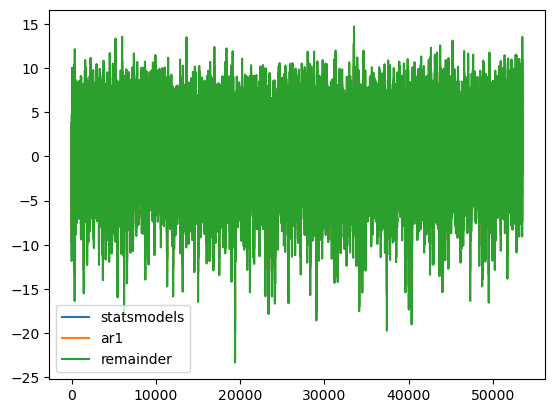

In [21]:
ar_model = AutoReg(endog=df["remainder"], lags=4).fit()

# ar_model.predict().plot(label="statsmodels")
# df["prediction_ar1"].plot(label="ar1")
# df["remainder"].plot(label="remainder")
# plt.legend()